# Hierarchical Clustering

## Library 임포트

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## dataset 읽어오기

In [3]:
df = pd.read_csv('data/Mall_Customers.csv')

In [5]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Dendrogram 을 그리고, 최적의 클러스터 갯수를 찾아보자.

In [7]:
X = df.iloc[ : , 3 : ]

In [8]:
X.head(3)

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6


In [9]:
import scipy.cluster.hierarchy as sch

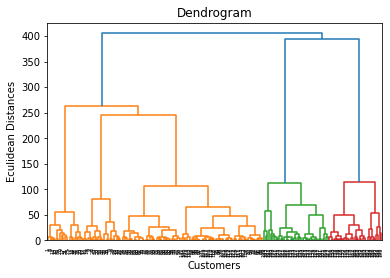

In [13]:
sch.dendrogram(sch.linkage(X, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Eculidean Distances')
        # 삼각함수 이용해서 구하는 거리라는뜻 = > Eculidean
plt.show()

In [ ]:
# 위로 뻗어있는 긴선들중에
# 가로로 선을 긋는데
# 적당한 많이 길지않고 짧지않는 곳을 생각해
# 가로로 선을 긋고 겹치는 부분이 그룹의 갯수

In [14]:
X.shape

(200, 2)

## Training the Hierarchical Clustering model

In [16]:
from sklearn.cluster import AgglomerativeClustering
                            # 병합적 분집

In [17]:
hc = AgglomerativeClustering(n_clusters= 5)
                                # 방정식으로 안하기때문에 random X

In [20]:
y_pred = hc.fit_predict(X)

In [22]:
df['Group'] = y_pred

In [25]:
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Group
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
195,196,Female,35,120,79,2
196,197,Female,45,126,28,0
197,198,Male,32,126,74,2
198,199,Male,32,137,18,0


## 그루핑 정보를 확인

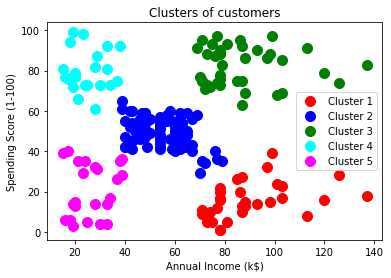

In [26]:
plt.scatter(X.values[y_pred == 0, 0], X.values[y_pred == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X.values[y_pred == 1, 0], X.values[y_pred == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X.values[y_pred == 2, 0], X.values[y_pred == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X.values[y_pred == 3, 0], X.values[y_pred == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X.values[y_pred == 4, 0], X.values[y_pred == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

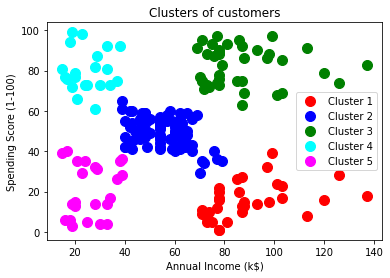

In [5]:
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

## 그룹 정보를 데이터셋에 추가

## 마케팅 이메일을 보내기 위해, 3번 그룹의 고객들만 가져와보자. 